## `K Means` **Implementation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state = 42)

In [3]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [4]:
Y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

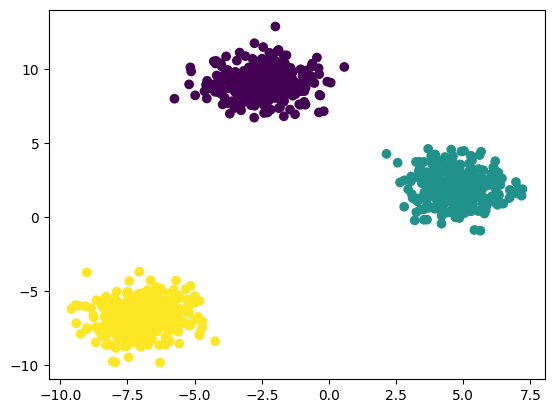

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 42, test_size = 0.33)

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans
# Elbow method to select the k value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

## Plot the `Elbow Curve`

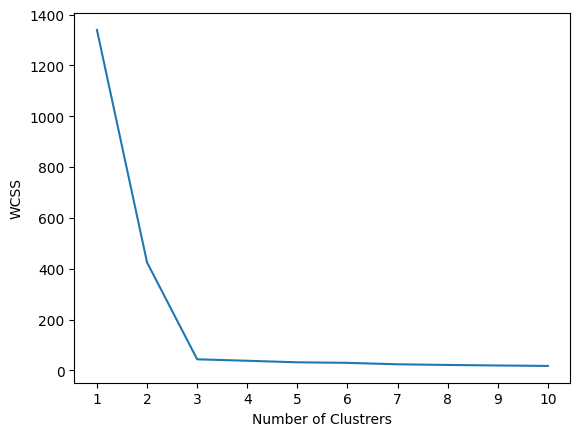

In [11]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, init = "k-means++")

In [13]:
kmeans.fit(X_train_scaled)
Y_pred = kmeans.predict(X_test_scaled)

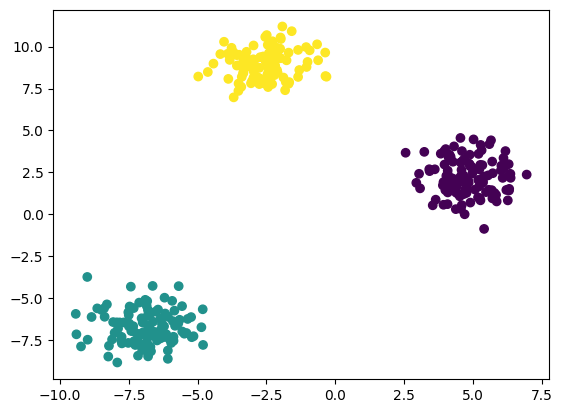

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred);

## `Kneed` -> (`KneeLocator`)

In [19]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11),wcss,curve = "convex",direction = "decreasing")
k1.elbow

np.int64(3)

## `Silhoutte Score`

In [21]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_) # Most Important Step
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[np.float64(0.5024632966384367),
 np.float64(0.842476016737992),
 np.float64(0.6745709936969302),
 np.float64(0.510324265697521),
 np.float64(0.4997970610187338),
 np.float64(0.3485383505150064),
 np.float64(0.32922450857614766),
 np.float64(0.32052291122751847),
 np.float64(0.32774513949627226)]

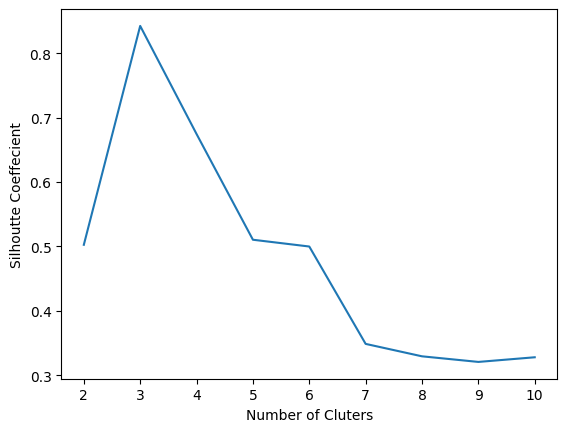

In [23]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()